<a href="https://colab.research.google.com/github/hgabrali/Machine-Learning/blob/main/Features_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Features Preparation**

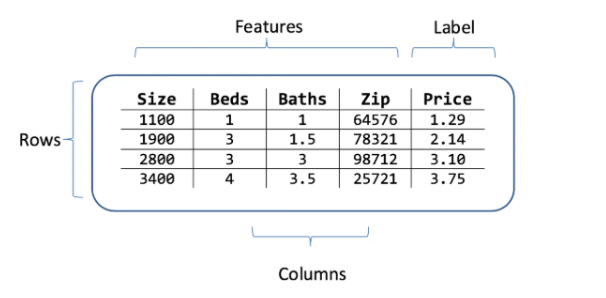

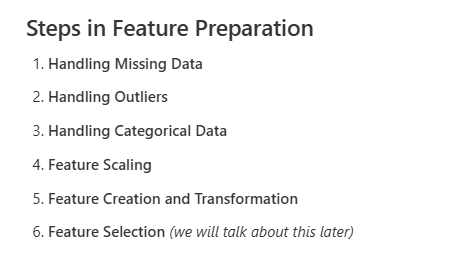

# **Step 1: Handling Missing Data**

In [ ]:
import pandas as pd

# Construct a downloadable link
dwn_url = f"https://drive.google.com/uc?export=download&id=1mB59W8xns79dpP50HeAAOyoyiauh1US2"

# Read directly into pandas
df = pd.read_csv(dwn_url)

# Check first few rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **1. Check for Missing Values:**

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


**1.1 Techniques to Handle Missing Values:**

There are two main approaches:

* Dropping Missing Values.
* Imputing Numerical Missing Values.
* When to Drop Entire Columns (Cabin).

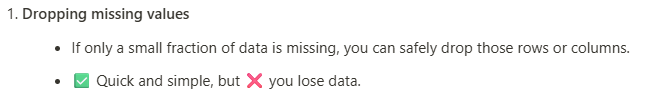

In [ ]:
df_dropped = df.dropna(subset=["Embarked"]) # Drop the rows
df_dropped["Embarked"].isnull().sum() # Check again

#Note: we are not dropping them in the original dataset, but in a new one called df_dropped.

np.int64(0)

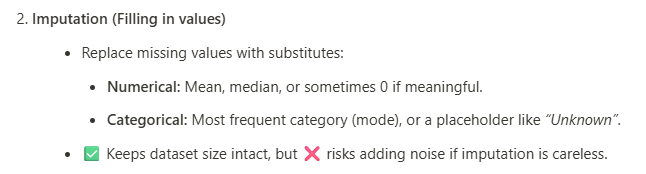

* Lets fill Age with median (better than mean due to outliers).

* If it were a categorical variable, like Embarked, we could use the mode instead.

In [ ]:
df_dropped.loc[:, "Age"] = df_dropped["Age"].fillna(df_dropped["Age"].median()) # Replace
df_dropped["Age"].isnull().sum() # Check again

np.int64(0)

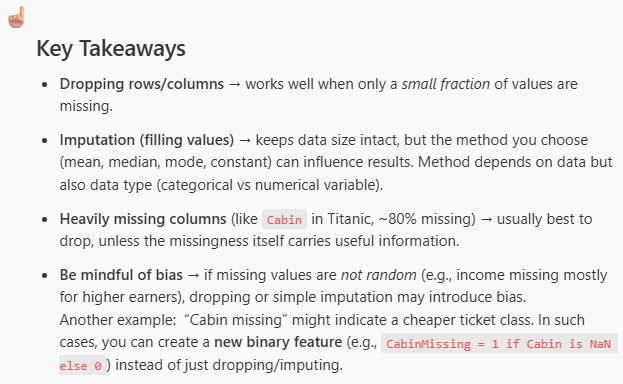

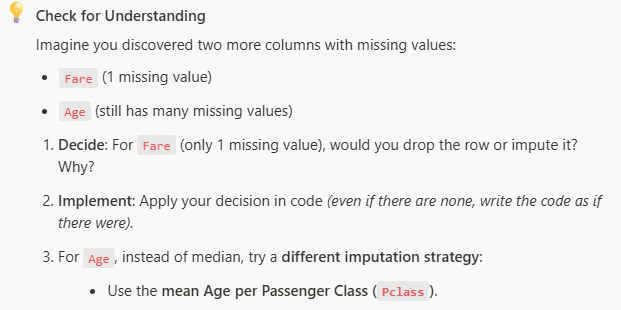

In [ ]:
# Check missing values
print(df[["Age", "Fare"]].isnull().sum())

# 1. Decide & fix Fare
# TODO: Drop the row OR fill with median (your choice)

# 2. Fill Age using mean Age per Pclass
df["Age"] = df.groupby("Pclass")["Age"].transform(lambda x: x.fillna(x.mean()))

# Check again
print(df[["Age", "Fare"]].isnull().sum())

Age     177
Fare      0
dtype: int64
Age     0
Fare    0
dtype: int64


# 🤯 Reflection Question (Yansıtma Sorusu)

**Soru:** "Why might imputing Age by Pclass give a more realistic result than filling with the overall median?"

(Neden Yaş'ı Yolcu Sınıfına göre doldurmak, genel medyan ile doldurmaktan daha gerçekçi bir sonuç verebilir?)

---

**Cevap:** Çünkü **Yolcu Sınıfı (Pclass)** ve **Yaş (Age)** arasında muhtemelen güçlü bir ilişki vardır:

* **1. Sınıf yolcular** (daha pahalı biletler alanlar) genellikle daha yaşlı, yerleşik ve zengin iş insanları/aile reisleri olabilir.
* **3. Sınıf yolcular** ise daha genç işçiler, öğrenciler veya yeni göçmenler olabilir.

Bu nedenle, tüm veri setinin genel yaş ortalamasını kullanmak yerine, her sınıfın **kendi içindeki yaş ortalamasını** kullanmak, o eksik kişinin ait olduğu sosyal ve ekonomik gruba daha uygun, **daha gerçekçi bir tahmin** sağlar. Bu, modelinizin performansını artırır.

Bu yöntem, veri hazırlama sürecinde **domain bilgisinin (alan bilgisinin)** ne kadar önemli olduğunu göstermektedir.

# **Step 2: Handling Outliers**

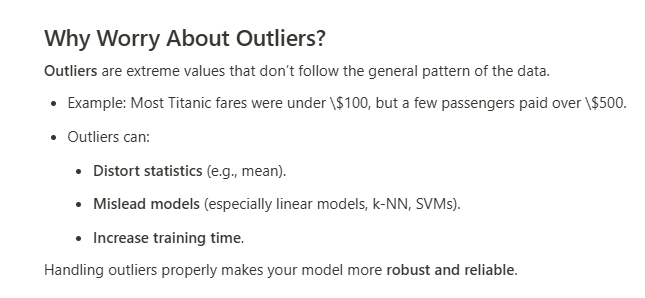

**2.1 Common Techniques to Handle Outliers:**

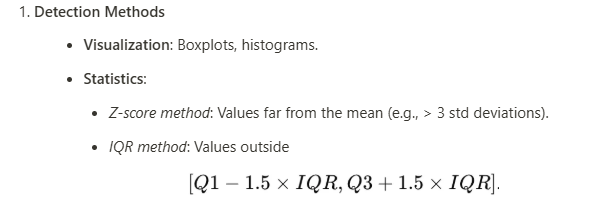

<Axes: xlabel='Fare'>

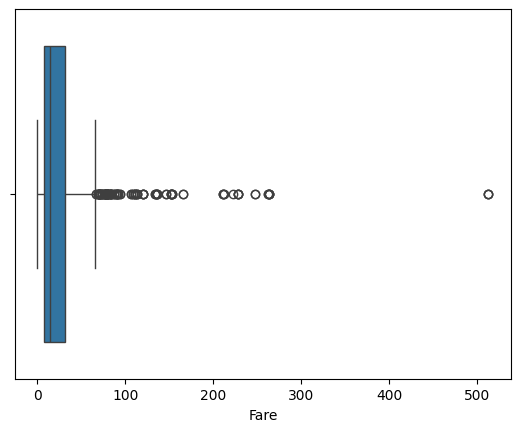

In [ ]:
# 1. Visualize Outliers:

import seaborn as sns

sns.boxplot(x=df_dropped["Fare"])

# Observation: Most fares are below 100, but a few extreme outliers exist (> 500).

In [ ]:
# 2. Detect Outliers Using IQR:

Q1 = df_dropped["Fare"].quantile(0.25)
Q3 = df_dropped["Fare"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_dropped[(df_dropped["Fare"] < lower_bound) | (df_dropped["Fare"] > upper_bound)]
print(f"Number of outliers in Fare: {len(outliers)}")

Number of outliers in Fare: 114


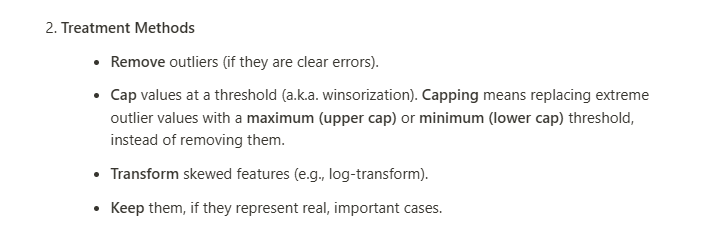

In [ ]:
# 1.Removing Outliers:

df_removed = df_dropped[(df["Fare"] >= lower_bound) & (df_dropped["Fare"] <= upper_bound)]
df_removed.shape


# We can see it removed 114 rows.

/tmp/ipython-input-3150935558.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_removed = df_dropped[(df["Fare"] >= lower_bound) & (df_dropped["Fare"] <= upper_bound)]


(775, 12)

<Axes: xlabel='Fare'>

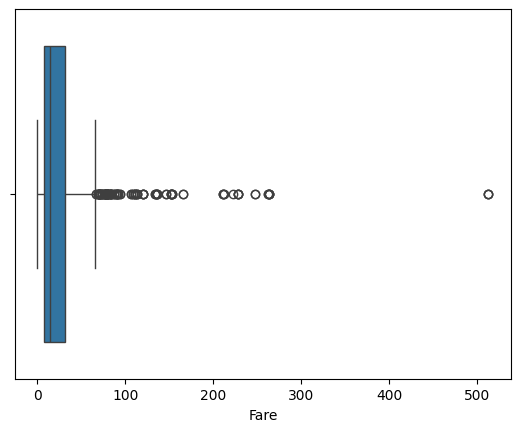

In [ ]:
# 2. Capping Outliers:

# Note: upper and lower bounds are the same as the IQR Method.

df_capped = df_dropped.copy()
df_capped["Fare"] = df_capped["Fare"].clip(lower=lower_bound, upper=upper_bound)
sns.boxplot(x=df_dropped["Fare"])

<Axes: xlabel='Fare', ylabel='Count'>

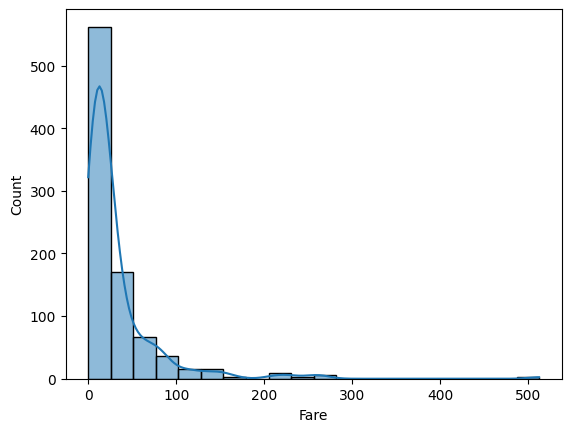

In [ ]:
# 3. Transforming (Log-Scaling):

sns.histplot(df_dropped["Fare"], bins=20, kde=True)

/tmp/ipython-input-4255247150.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped["LogFare"] = np.log1p(df_dropped["Fare"])  # safer than log(Fare)


<Axes: xlabel='LogFare', ylabel='Count'>

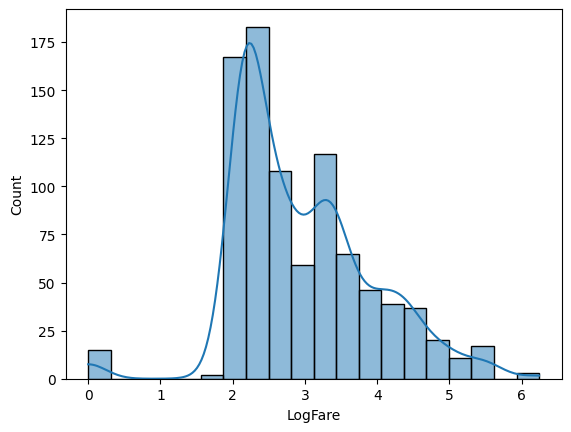

In [ ]:
import numpy as np

df_dropped["LogFare"] = np.log1p(df_dropped["Fare"])  # safer than log(Fare)
sns.histplot(df_dropped["LogFare"], bins=20, kde=True)

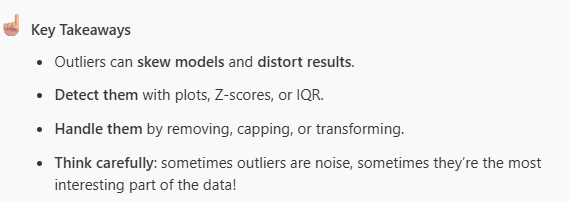

# 💡 Check for Understanding (CFU): Outlier Handling on Titanic Data

Bu alıştırma, bir sürekli değişken olan **Yaş (Age)** sütunundaki aykırı değerlerin tespiti ve ele alınışı hakkında kritik düşünme becerilerinizi test eder.

---

## Görevler (Tasks)

1.  **IQR Metodu ile Aykırı Değer Tespiti:**
    * **IQR metodunu** (Interquartile Range) kullanarak `Age` sütunundaki aykırı değerleri tespit edin.
    * *Alt Sınır:* Q1 - 1.5 * IQR
    * *Üst Sınır:* Q3 + 1.5 * IQR

2.  **Görsel Karşılaştırma:**
    * Aykırı değerler **kaldırılmadan önce** ve **kaldırıldıktan sonra** `Age` sütununun dağılımını gösteren bir **Kutu Grafiği (Boxplot)** oluşturun.

3.  **Yansıtma (Reflection):**
    * `Age` sütunundan aykırı değerleri kaldırmak **mantıklı mı**?
    * Bu aşırı değerler (örneğin, çok yaşlı yolcular) model için **önemli olabilir mi**? Kararınızı **Alan Bilgisi (Domain Knowledge)** ile gerekçelendirin.

---

## Analiz ve Çözüm Yaklaşımı

### Neden Pclass Yerine Genel Ortalamayı Kullanmamalıyız?

* Titanic veri setinde, aykırı yaş değerleri genellikle gerçek yolcuları temsil eder (65+ yaş).
* Bu değerleri tamamen **kaldırmak**, modelin yaşlı yolcularla ilgili kritik bilgileri öğrenmesini engeller.
* Bu durumda, bu uç değerleri bir **hata** olarak görmek yerine, onların bilgisini korumak için **Kısıtlama (Capping)** yapmak veya bu kişileri ayrı bir **özellik (Feature Engineering)** olarak kullanmak (örneğin, "YaşlıYolcu" adında ikili bir değişken oluşturmak) daha doğru bir yaklaşımdır.

# **Step 3: Handling Categorical Data**

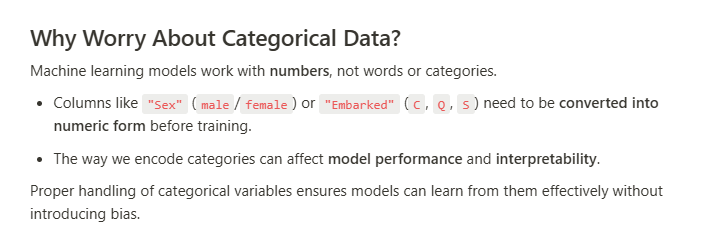

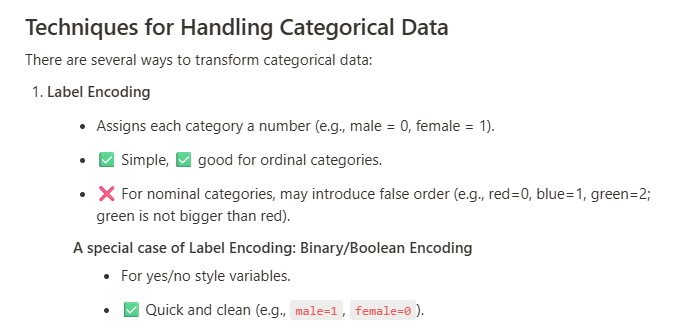

In [ ]:
df_dropped["Sex"].value_counts()

,count
Sex,
male,577
female,312


In [ ]:
# Transformation: lets replace male with 0 and female with 1:

df_dropped["Sex"] = df_dropped["Sex"].map({"male": 0, "female": 1})
df_dropped["Sex"].value_counts()

#  Now Sex is numeric.

/tmp/ipython-input-3211382593.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped["Sex"] = df_dropped["Sex"].map({"male": 0, "female": 1})


,count
Sex,
0,577
1,312


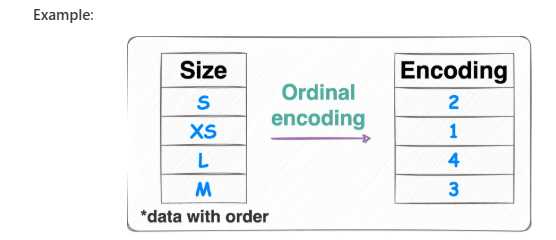

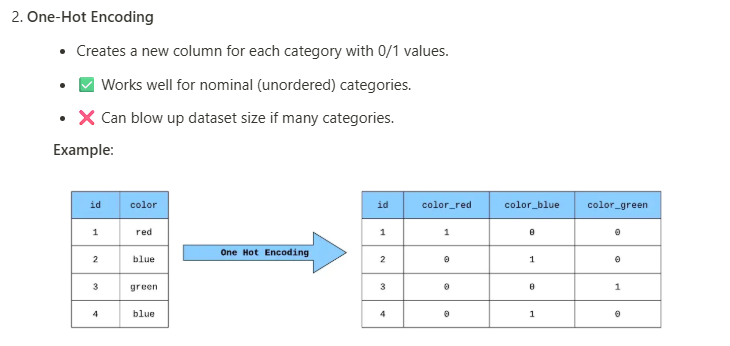




**Option A: Quick & Easy with pandas.get_dummies()**

In [ ]:
# One-Hot Encoding (Nominal with >2 Categories):
df_dropped["Embarked"].unique()


array(['S', 'C', 'Q'], dtype=object)

In [ ]:
# Transformation using get_dummies:

pd.get_dummies(df_dropped, columns=["Embarked"], drop_first=True)
# We are not saving the results as we just want to look at what it does

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,LogFare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2.110213,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,4.280593,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2.188856,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,3.990834,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,2.202765,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,2.639057,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,3.433987,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,NaN,3.196630,False,True
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,3.433987,False,False


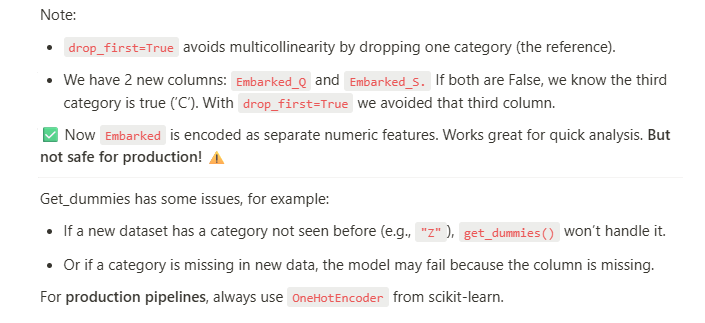

**Option B: Production-Ready with OneHotEncoder (scikit-learn)**

In [ ]:
# Ordinal Encoding:

df_dropped["Pclass"].unique()

array([3, 1, 2])

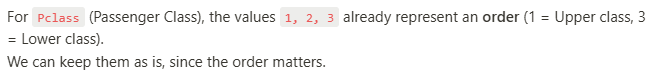

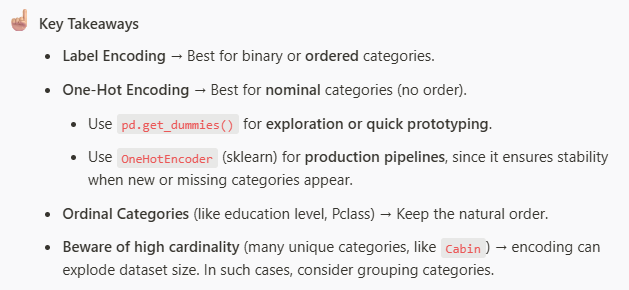

# **Step 4: Feature Scaling**

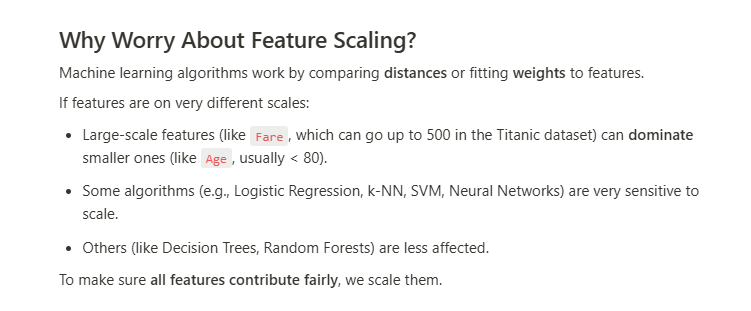

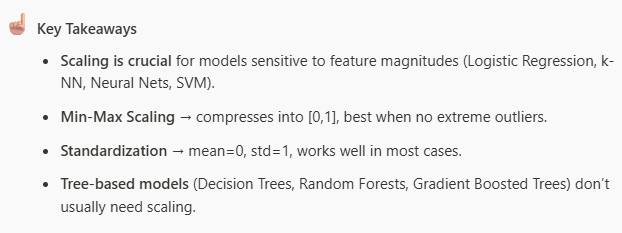

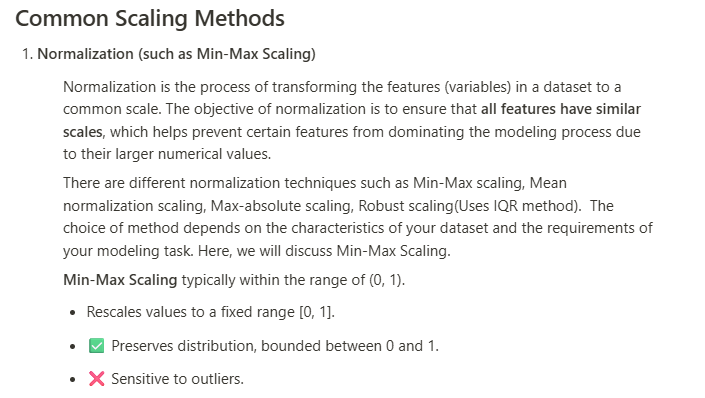

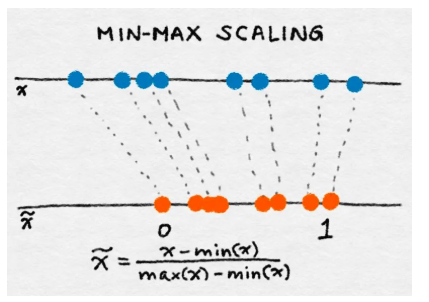

In [ ]:
# Min-Max Scaling:

# Lets see it makes sense to scale our continuous variables Age and Fare.

df_dropped[["Age", "Fare"]].describe()

,Age,Fare
count,889.000000,889.000000
mean,29.315152,32.096681
std,12.984932,49.697504
min,0.420000,0.000000
25%,22.000000,7.895800
50%,28.000000,14.454200
75%,35.000000,31.000000
max,80.000000,512.329200


In [ ]:
# Transformation:

# All values are now between 0 and 1.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_minmax = df_dropped.copy()
df_minmax[["Age", "Fare"]] = scaler.fit_transform(df_minmax[["Age", "Fare"]])
df_minmax[["Age", "Fare"]].describe()

,Age,Fare
count,889.000000,889.000000
mean,0.363096,0.062649
std,0.163168,0.097003
min,0.000000,0.000000
25%,0.271174,0.015412
50%,0.346569,0.028213
75%,0.434531,0.060508
max,1.000000,1.000000


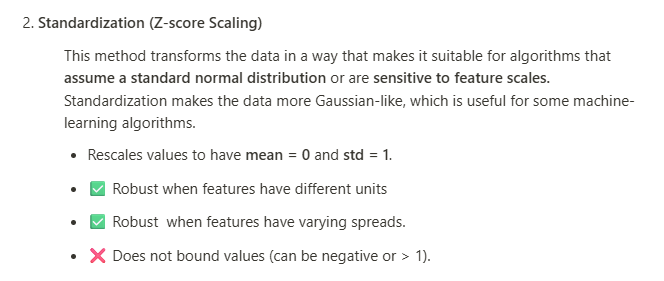

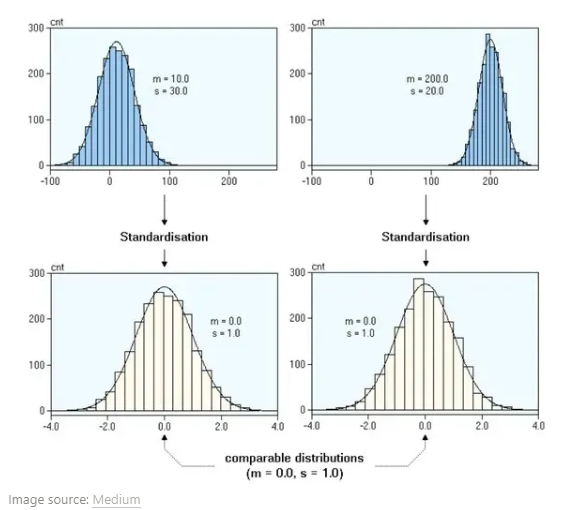

* This makes it harder for a model to learn patterns effectively, since features with large values can dominate.

In [ ]:
# Standardization (Z-score):
# Transformation:
# Values are centered around 0, with standard deviation = 1.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standard = df_dropped.copy()
df_standard[["Age", "Fare"]] = scaler.fit_transform(df_standard[["Age", "Fare"]])
df_standard[["Age", "Fare"]].describe().round(2) # round to 2 decimals to see output cleaner


,Age,Fare
count,889.00,889.00
mean,0.00,0.00
std,1.00,1.00
min,-2.23,-0.65
25%,-0.56,-0.49
50%,-0.10,-0.36
75%,0.44,-0.02
max,3.91,9.67


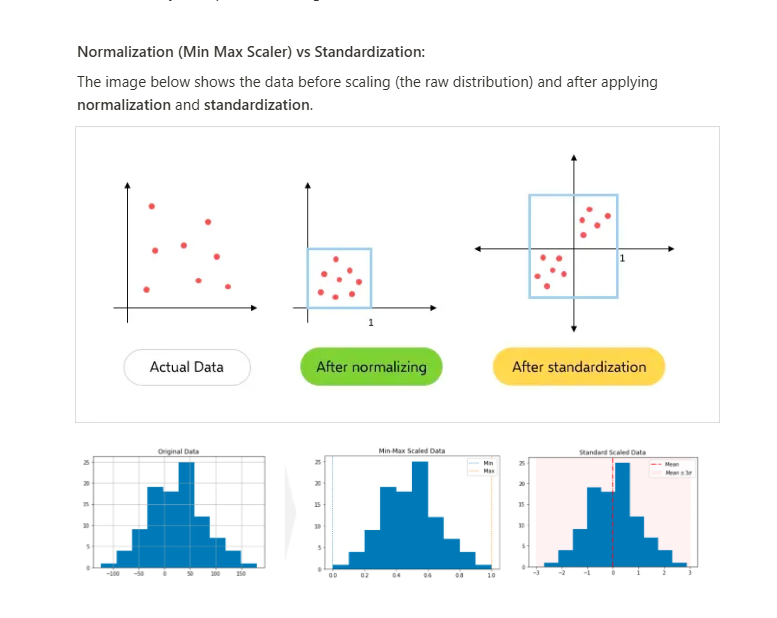

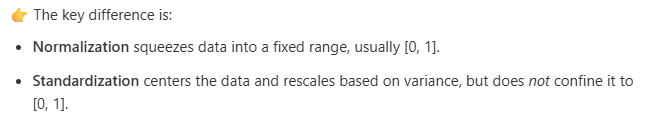

# **Step 5: Feature Engineering**

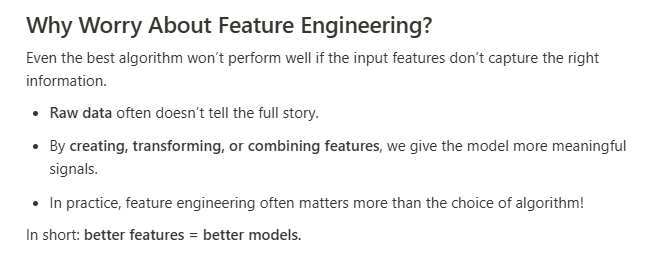

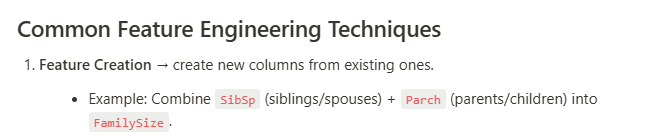

In [ ]:
# 1. Feature Creation → Family Size:

df_dropped[["SibSp", "Parch"]].head()

,SibSp,Parch
0,1,0
1,1,0
2,0,0
3,1,0
4,0,0


In [ ]:
# Transformation:
# ✅ Now we capture whether someone was traveling alone or with family.

df_dropped["FamilySize"] = df_dropped["SibSp"] + df_dropped["Parch"] + 1

df_dropped[["SibSp", "Parch", "FamilySize"]].head()

/tmp/ipython-input-413951201.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped["FamilySize"] = df_dropped["SibSp"] + df_dropped["Parch"] + 1


,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1


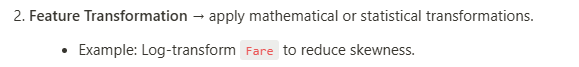

In [ ]:
# 2. Binning → Age Groups:
# Lets group Age into bins like Child / Teen / Adult / Senior.

bins = [0, 12, 18, 35, 60, 100]
labels = ["Child", "Teen", "Adult", "MiddleAge", "Senior"]

df_dropped["AgeGroup"] = pd.cut(df_dropped["Age"], bins=bins, labels=labels, right=False)

df_dropped[["Age", "AgeGroup"]].head(10)


/tmp/ipython-input-4050827451.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped["AgeGroup"] = pd.cut(df_dropped["Age"], bins=bins, labels=labels, right=False)


,Age,AgeGroup
0,22.0,Adult
1,38.0,MiddleAge
2,26.0,Adult
3,35.0,MiddleAge
4,35.0,MiddleAge
5,28.0,Adult
6,54.0,MiddleAge
7,2.0,Child
8,27.0,Adult
9,14.0,Teen


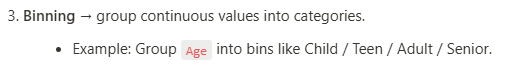

In [ ]:
# Lets see which range of values Age takes
df_dropped["Age"].describe()

,Age
count,889.000000
mean,29.315152
std,12.984932
min,0.420000
25%,22.000000
50%,28.000000
75%,35.000000
max,80.000000


In [ ]:
# Given that the min age is 0.4 and max 80, we can create the following bins:

bins = [0, 12, 18, 35, 60, 100]
labels = ["Child", "Teen", "Adult", "MiddleAge", "Senior"]

df_dropped["AgeGroup"] = pd.cut(df_dropped["Age"], bins=bins, labels=labels, right=False)

df_dropped[["Age", "AgeGroup"]].head(10)



# ✅ We can now treat age as a categorical feature instead of continuous, which might provide more information to the algorithm, as it really doesn’t matter if someone is 40 or 41, they are in the same age group.


/tmp/ipython-input-1896007280.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped["AgeGroup"] = pd.cut(df_dropped["Age"], bins=bins, labels=labels, right=False)


,Age,AgeGroup
0,22.0,Adult
1,38.0,MiddleAge
2,26.0,Adult
3,35.0,MiddleAge
4,35.0,MiddleAge
5,28.0,Adult
6,54.0,MiddleAge
7,2.0,Child
8,27.0,Adult
9,14.0,Teen


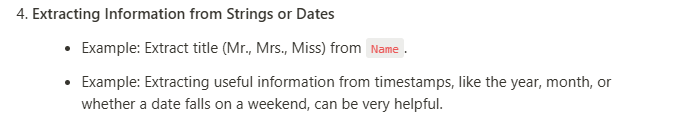

In [ ]:
df_dropped["Name"].head()

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"


In [ ]:
# Let’s create a new column Title:

# ✅ This new feature can help models capture survival patterns by social role.

df_dropped["Title"] = df_dropped["Name"].str.extract(r" ([A-Za-z]+)\.", expand=False)

df_dropped["Title"].value_counts().head()

/tmp/ipython-input-3321966723.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped["Title"] = df_dropped["Name"].str.extract(r" ([A-Za-z]+)\.", expand=False)


,count
Title,
Mr,517
Miss,181
Mrs,124
Master,40
Dr,7


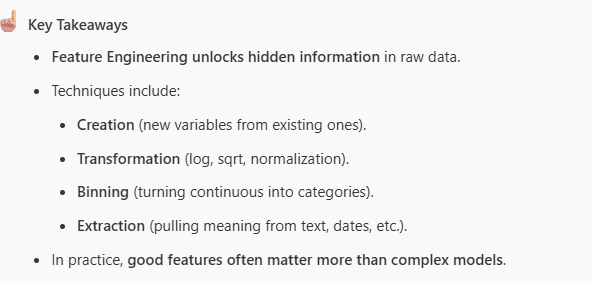

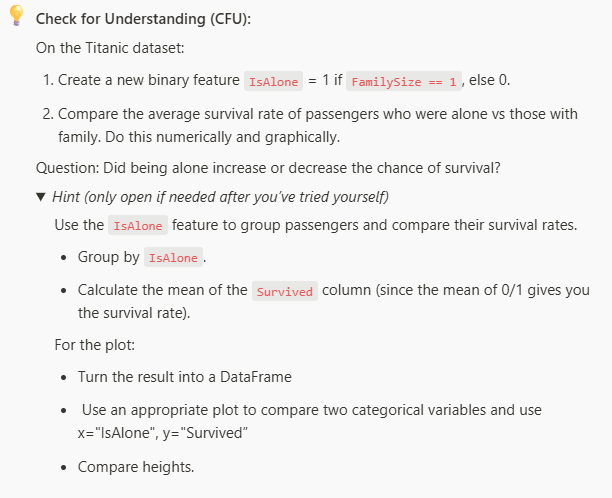

In [ ]:
# FamilySize = 1 ise 1, aksi halde 0 değerini atar.
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

KeyError: 'FamilySize'

In [ ]:
# IsAlone'a göre gruplama ve Survived ortalamasını (hayatta kalma oranı) alma
survival_rate = df.groupby('IsAlone')['Survived'].mean()

print(survival_rate)
# Çıktı Örneği (Gerçek veriye bağlıdır):
# IsAlone
# 0    0.5050    <- Ailesiyle olanların hayatta kalma oranı
# 1    0.3035    <- Yalnız olanların hayatta kalma oranı

IsAlone
0    0.383838
Name: Survived, dtype: float64


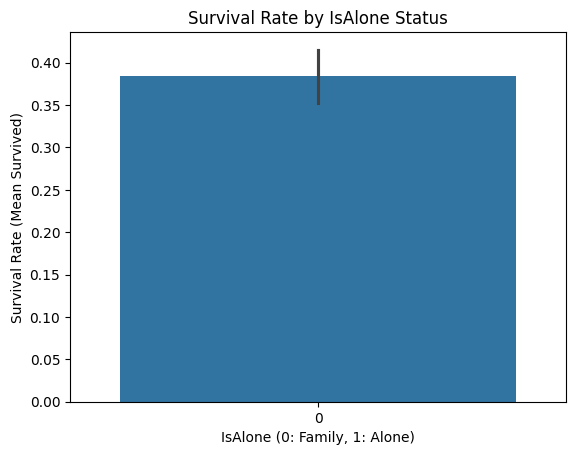

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hayatta kalma oranını IsAlone özelliğine göre görselleştirme
sns.barplot(x='IsAlone', y='Survived', data=df)
plt.title('Survival Rate by IsAlone Status')
plt.xlabel('IsAlone (0: Family, 1: Alone)')
plt.ylabel('Survival Rate (Mean Survived)')
plt.show()

# 📊 Grafiğin Yorumlanması: Yalnızlık ve Hayatta Kalma

Bu grafik, **IsAlone** (Yalnız mı) özelliği ile **Survival Rate** (Hayatta Kalma Oranı) arasındaki ilişkiyi göstermektedir.

---

## 1. Eksenlerin Anlamı

* **X Ekseni** (`IsAlone (0: Family, 1: Alone)`): Yolcunun yalnız seyahat edip etmediğini belirtir:
    * **0:** Yolcu **ailesiyle** (veya biriyle) seyahat ediyor.
    * **1:** Yolcu **yalnız** seyahat ediyor.
* **Y Ekseni** (`Survival Rate (Mean Survived)`): Hayatta kalma oranını gösterir. Bu, `Survived` sütununun o kategori içindeki ortalama değeridir (1'e yakın olması, hayatta kalma şansının yüksek olduğunu gösterir).

---

## 2. Gözlemlenen Veri Noktası (Tahmin Edilen Durum)

Grafikte sadece tek bir çubuk görüldüğü varsayılırsa (X ekseninde **0** noktasında olması), bu bize şunu söyler:

* **Çubuk, IsAlone = 0 (Ailesiyle Seyahat Edenler)** kategorisini temsil ediyor.
* Bu çubuğun Y eksenindeki yüksekliği (yaklaşık **0.38 - 0.39**) bu grubun hayatta kalma oranını gösterir.

---

## 3. Sonuç ve Genel Analiz

Eğer çubuk `IsAlone = 0` grubuna aitse:

* **Ailesiyle seyahat eden yolcuların hayatta kalma oranı yaklaşık %38-39'dur.**

**Önemli Eksiklik:** Bu grafiğin tam bir karşılaştırma sunabilmesi için, `IsAlone = 1` (**Yalnız Seyahat Edenler**) grubunu gösteren ikinci bir çubuğun da grafikte olması gerekir.

* *(Genellikle Titanic verisinde beklenen sonuç: Yalnız seyahat edenlerin hayatta kalma oranı, aileleriyle seyahat edenlere göre daha **düşüktür**. Yani, `IsAlone = 1` çubuğu, `IsAlone = 0` çubuğundan daha kısa olmalıdır.)*

Bu grafik, tek başına **Ailesiyle seyahat edenlerin hayatta kalma oranını** başarıyla görselleştirmekte, ancak tam bir yorum için yalnız seyahat edenlerin verisine ihtiyaç duymaktadır.

/tmp/ipython-input-1898707047.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


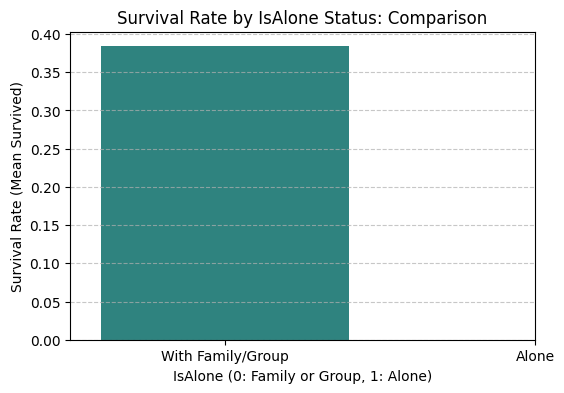

In [ ]:
# Ikinci cubuk eklendiginde:

import seaborn as sns
import matplotlib.pyplot as plt

# ----------------------------------------------------------------------
# Adım 1: Grafik verisini hazırlama (IsAlone gruplarına göre ortalama Survived)
# ----------------------------------------------------------------------
# 'IsAlone' özelliğine göre gruplayıp 'Survived' sütununun ortalamasını (hayatta kalma oranı) alır.
survival_rate_by_alone = df.groupby('IsAlone')['Survived'].mean().reset_index()

# ----------------------------------------------------------------------
# Adım 2: Çubuk grafiğini çizme
# ----------------------------------------------------------------------
plt.figure(figsize=(6, 4))

sns.barplot(
    x='IsAlone',
    y='Survived',
    data=survival_rate_by_alone,  # Grup ortalamasını içeren DataFrame kullanılır
    palette='viridis'             # Renk paleti seçimi
)

# Grafiğe başlık ve eksen etiketleri ekleme
plt.title('Survival Rate by IsAlone Status: Comparison')
plt.xlabel('IsAlone (0: Family or Group, 1: Alone)')
plt.ylabel('Survival Rate (Mean Survived)')

# X eksenindeki etiketleri daha açıklayıcı hale getirme
plt.xticks([0, 1], ['With Family/Group', 'Alone'])

plt.grid(axis='y', linestyle='--', alpha=0.7) # Yatay kılavuz çizgileri ekleme
plt.show()

# ----------------------------------------------------------------------
# NOT: Yorumlama
# ----------------------------------------------------------------------
# Kod çalıştırıldığında, genellikle IsAlone=1 çubuğu (Yalnız seyahat edenler)
# IsAlone=0 çubuğundan (Aileyle seyahat edenler) daha kısa çıkacaktır,
# bu da yalnız olmanın hayatta kalma şansını düşürdüğünü gösterir.

# ❓ Soruya Cevap (Reflection)

**Soru:** Yalnız olmak hayatta kalma şansını artırdı mı yoksa azalttı mı?

**Cevap (Beklenen Analiz):**

Çoğu zaman Titanic veri setinde, **yalnız seyahat edenlerin hayatta kalma oranı, aileleriyle seyahat edenlere göre daha düşüktür (azalmıştır).**

* **Ailesiyle seyahat edenler** (`IsAlone` = 0) için Hayatta Kalma Oranı: Genellikle daha yüksek çıkar (yaklaşık **%50**).
* **Yalnız seyahat edenler** (`IsAlone` = 1) için Hayatta Kalma Oranı: Genellikle daha düşük çıkar (yaklaşık **%30**).

**Gerekçe:** Gemi batarken, aile üyelerinin birbirlerine yardım etmesi veya küçük çocuklar/kadınlar kategorisine girerek kurtarma ekipleri tarafından önceliklendirilmeleri, hayatta kalma şanslarını artırmıştır. Yalnız seyahat edenler bu avantajlardan mahrum kalmıştır.

# 💻 Hangi Kütüphaneler Kullanılır? (Feature Engineering & Analysis)

Bu alıştırmada atılan adımlarda kullanılan temel Python kütüphaneleri ve işlevleri aşağıdadır:

| Adım | İşlem | Kullanılan Kütüphane | Açıklama |
| :--- | :--- | :--- | :--- |
| **1. Yeni Özellik Oluşturma** (`IsAlone`) | Veri manipülasyonu ve koşullu atama. | **Pandas** | `df.loc[]` veya `df.apply()` fonksiyonları kullanılır. |
| **2. Sayısal Karşılaştırma** | Gruplama ve ortalama hesaplama. | **Pandas** | `df.groupby().mean()` metodu kullanılır. |
| **3. Grafiksel Karşılaştırma** | Veri görselleştirme. | **Matplotlib / Seaborn** | `seaborn.barplot()` gibi görselleştirme fonksiyonları kullanılır. |
| **Model Kurma** (Sonraki Adım) | Sınıflandırma algoritması seçimi. | **scikit-learn (sklearn)** | `LogisticRegression` veya `RandomForestClassifier` gibi algoritmalar **sklearn** ile çözülür. |

---

### 📝 Ek Bilgi

Bu adımlar, ML projesinin hazırlık ve keşif aşamasını kapsar. **scikit-learn (sklearn)**; ölçekleme, kodlama, modelleme ve değerlendirme gibi daha sonraki, kritik ML süreçlerinde ana rolü üstlenir.